### Below is a simple class function using the available functions in neo. This function make the extraction of spike more intuitive.

In [1]:
# a class function for extracting spike trains from desired unit of a channel in a specified trial-type
class FromDataBlock(object):
    def __init__(self,data_block):
        self.data_block = data_block
        self.total_electrodes = len(data_block.channel_indexes)
        self.total_trial_no = len(data_block.segments)
        self.list_of_trials = []
    
    def extract_segment_desired_trialtype(self, desired_trial_type):
        return data_block.filter( targdict={'belongs_to_trialtype': desired_trial_type},
                                  objects=neo.Segment )
    
    def check_empty_spktrain(self, spktrain):
        if spktrain == []:
            print ("This connection ID has no recording of the spike train. Choose another connector ID.")
        #else:
            #return spktrain
        
    def extract_spiketrains_for_desired_trialtype_connectid(self, desired_trial_type, desired_connect_id):
        segment_desired_trial_type = self.extract_segment_desired_trialtype(desired_trial_type)
        spiketrains_for_desired_connectid = []
        for seg_i in range(len(segment_desired_trial_type)):
            a_seg = segment_desired_trial_type[seg_i]
            for spk_j in range(len(a_seg.spiketrains)):
                if a_seg.spiketrains[spk_j].annotations['connector_aligned_id'] == desired_connect_id:
                    spiketrains_for_desired_connectid.append(a_seg.spiketrains[spk_j])
                else:
                    pass
        self.check_empty_spktrain(spiketrains_for_desired_connectid)
        return spiketrains_for_desired_connectid
        
    def extract_spiketrains_for_desired_unit(self, spiketrains, unit_id):
            return [value for i, value in enumerate(spiketrains)
                                if value.annotations['unit_id']==unit_id ]

In [2]:
%%capture
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

### For a desired dataset
**A dataset is A neo Block**

In [3]:
path = './data/' # if the directory data is in same path
data_idx = 0
data_block = np.load(path + 'data{}.npy'.format(data_idx), encoding='latin1').item()

# Objective: Rasterplotting of a desired spike train
![](extract_spiketrain_for_one_unit.png)

### To extract desired spike train using the above class

In [4]:
extract_func = FromDataBlock(data_block) # instantiate the class

**Extract all spike trains from a desired channel for a particular trial type**

In [6]:
desired_trial_type = 'PGLF'
desired_channel = 2 # this is the electrode connection id aligned linearly

In [7]:
all_spiketrains = extract_func.extract_spiketrains_for_desired_trialtype_connectid(desired_trial_type, desired_channel)

**Extract spike trains from A unit of a desired channel for a particular trial type**

In [8]:
neurons_per_channel = 1 # this is the unit id integer representing no of neurons responsible for the spike train

In [9]:
desired_spiketrain = extract_func.extract_spiketrains_for_desired_unit(all_spiketrains,neurons_per_channel)

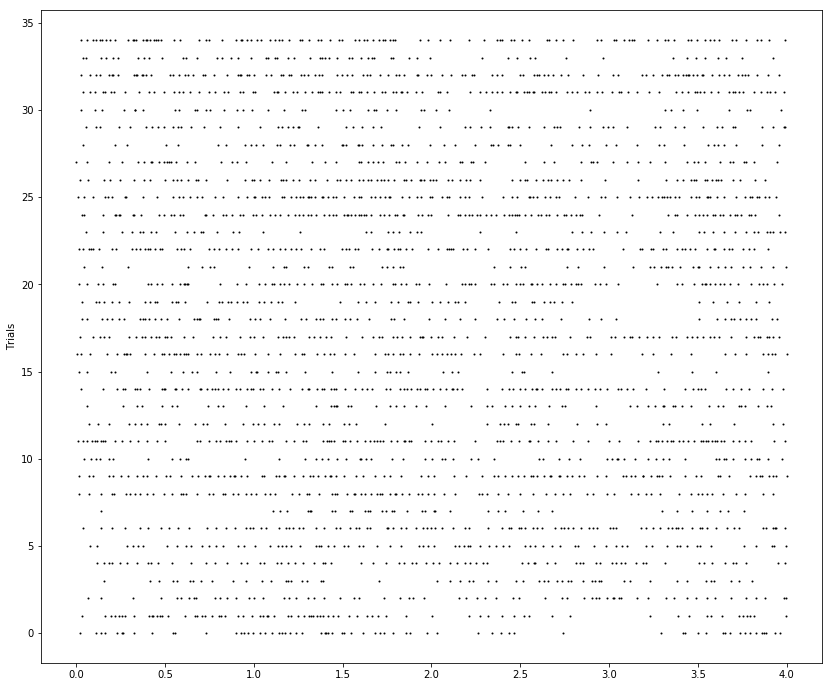

In [10]:
# Raster plot
plt.figure(figsize=(14,12))
markersize = 1

# Plotting the spikes
for idx, st in enumerate(desired_spiketrain):
    plt.plot(st, [idx] * len(st), 'ko', markersize=markersize)
    plt.ylabel("Trials")